In [36]:
# Inizialization
import matplotlib.pyplot as plt 
import numpy as np 

# Importing qiskit
from qiskit import IBMQ, Aer, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# Import basic plot tools
from qiskit.visualization import plot_histogram, array_to_latex

In [29]:
n = 2
grover_circuit = QuantumCircuit(n)

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [30]:
grover_circuit.cz(0,1) #oracle
grover_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [31]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [37]:
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()

array_to_latex(statevec, prefix="|\\psi\\rangle = ")

<IPython.core.display.Latex object>

In [38]:
grover_circuit.measure_all()

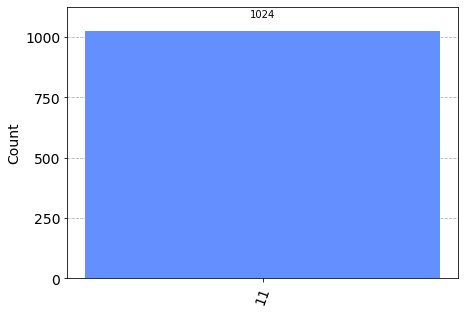

In [39]:
quasm_sim = Aer.get_backend('qasm_simulator')
result = quasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)